<img src="../img/htw-logo.png" width=150>


**I758 Wissens- und KI-basierte Systeme**

# Entscheidungsbäume
Quelle: KI Campus / Anpassungen CK

<font color="green"><b>KLAUSURTAUGLICH.</b></font>
Dieses Notebook gehört zu den fünf Notebooks, die Sie für die Klausur einreichen können. Bei vollständiger und korrekter Bearbeitung **erhalten Sie Punkte für die Abgabe, die zu Ihrer Klausur addiert werden.**

### CRISP-DM <a name="kap0"></a>

In diesem Jupyter Notebook soll zunächst der Ablauf eines typischen Projektes in Data Mining an einem kleinen Beispiel demonstriert werden. Dabei werden die typischen Schritte eines solchen Projektes analog zum CRISP-DM Modell durchgeführt und kurz erläutert, um einen Überblick zu geben und anschließend durchgeführt. Detaillierte Erläuterungen zu den einzelnen Schritte folgen in den späteren Modulen. 
Der erste Schritt in einem Data Mining Projekt ist die genaue Formulierung der Aufgabe. In allgemeinen Anwendungen wird eine Geschäftsidee formuliert oder ein Problem einer Fachabteilung vorgetragen. Diese sollten mit Hilfe von Daten lösbar sein.  
In Industrieanwendungen wird dieser Schritt oft von interdisziplinären Arbeitsgruppen, bestehend aus der Fachabteilung und der Data Science-Abteilung, entwickelt.  

Wir analysieren den bekannten öffentlichen Titanic-Datensatz, ein beliebter Datensatz für Einsteiger-Analysen. Die Einträge in den Daten beschreiben Passagiere, und eine wichtige Variable (Eigenschaft) ist ihr Überleben, nämlich 'überlebt' bzw. 'nicht überlebt'.

Damit wollen wir eine besondere KI, ein sogenanntes Klassifikationsmodell, lernen. In späteren Modulen des Kurses werden weitere Arten von Vorhersagemodellen thematisiert. Bei anderen Arten von Vorhersagemodellen sehen einzelne Ausgestaltungen der CRISP-DM Arbeitsbereiche unterschiedlich aus, die allgemeine Bedeutung der einzelnen Arbeitsbereiche bleibt aber gleich. 

Der Plan zur Erstellung des Modells ist, anhand der üblichen Schritte im CRISP-DM die Datengrundlage zu erforschen und dann Merkmale und einen Ansatz für eine Modellierung auszuwählen, sowie die Modellierung im Nachhinein bezüglich bestimmter Merkmale zu beurteilen und ggf. zu optimieren. 

###  Datenverständnis (Data Understanding) <a name="kap2"></a>

Ausgangspunkt für die Bearbeitung eines Data Mining Projekts sind selbstverständlich unterschiedliche Daten. In vielen Anwendungen, gerade im industriellen Kontext, ist es aufwändig, die passenden Daten zu finden und sie eventuell aus mehreren Quellen zusammen zu führen. 

Für das hier thematisierte Beispiel werden Informationen über die allgemeinen Merkmale der Reisenden und über die Frage, ob sie überlebt haben oder nicht, benötigt. 

Der Datensatz wird nun zunächst genauer betrachtet, um zu verstehen, welche Informationen zur Verfügung stehen.

Zu Beginn des Notebooks werden die grundlegenden Bibliotheken eingebunden, die in fast jedem Data Mining Projekt genutzt werden.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Der Datensatz wird nun zunächst mit `pd.read_csv()` eingelesen, da er im csv-Format vorliegt. Anschließend wird er für eine erste Übersicht ausgegeben um zu überprüfen, ob die Datei richtig eingelesen wurde. 

In [184]:
csv_path = "data/titanic.csv"
df = pd.read_csv(csv_path)  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Die Daten von 890 Reisenden wurden eingelesen und liefern folgende Informationen:  
- Die `PassengerId` nummeriert alle Reisenden durch.
- Das Merkmal `Survived` = 'Überlebt' gibt uns an, ob die Reisenden überlebt haben oder nicht. Dabei bedeutet  0 = nicht überlebt, 1 = überlebt.
- `Pclass` steht für die Ticketklasse. Es gab drei Klassen: 1, 2 und 3.
- `Name` enthält die vollständigen Namen der Reisenden.
- `Sex` = 'Geschlecht' gibt an, ob die Reisenden männlich oder weiblich waren.
- `Age` = 'Alter' ist das Alter der Reisenden zu Beginn der Reise.
- `SibSp` = 'Siblings/Spouses' = 'Geschwister/Ehepartner' zeigt an, wie viele Geschwister oder Ehepartner der Reisenden sich mit an Bord befanden.
- `Parch` = 'Parents/Children' = 'Eltern/Kinder' informiert uns darüber, wie viele Elternteile oder Kinder der Reisenden sich mit an Bord befanden.
- `Ticket` gibt die Ticketnummer der Reisenden an.
- `Fare` = 'Fahrpreis' ist der Fahrpreis, der von den Reisenden für die Überfahrt bezahlt wurde.
- `Cabin` = 'Kabine' enthält die Kabinennummer der Reisenden.
- `Embarked` = 'Eingeschifft' gibt den Ort an, an dem die Reisenden zugestiegen sind. Möglich sind C = Cherbourg, Q=Queenstown und S = Southampton.

Eine genaue Betrachtung der Tabelle zeigt, dass nicht alle Felder ausgefüllt sind. Es gibt zum Beispiel in Zeile 0 bei `Cabin` den Eintrag `NaN` = 'Not a number' (keine Zahl). Um Mehr Informationen über den Datensatz zu gewinnen, kann der folgende Befehl eingesetzt werden: 

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<span style="color:#FF5F00"><b>AUFGABE 1:</b></span><br>
Betrachten Sie die Ausgabe von ```.info()``` genau und beobachten Sie, welche Spalten besonders Problem-anfällig sind. Welche Datentypen sind vorhanden. 

<span style="color:green"><b>Antwort zur AUFGABE 1:</b></span><br>

Die Problem-auffällige Attribute kann man allein an der Anzahl von Null-Werten (_oder eher an der Differenz zwischen Gesamt- und Non-Null Anzahl_) erkennen. Das sind in diesem Fall: _Age_, _Cabin_ und _Embarked_.

Von vorhandenen Datentypen sind sofort die `int64` und `float64` für sowohl numerische (_Age_, _SibSp_) als auch für kategorische (_Survived, Pclass_) Werte zu sehen, sowie die `object`s für kategorische (_Sex_) und nominalen (_Name_) Werte.

#### Visualisierung

Die Visualisierung eines Datensatzes auf unterschiedlichen Wegen kann sehr hilfreich sein, um mehr Informationen über den Datensatz zu gewinnen. 

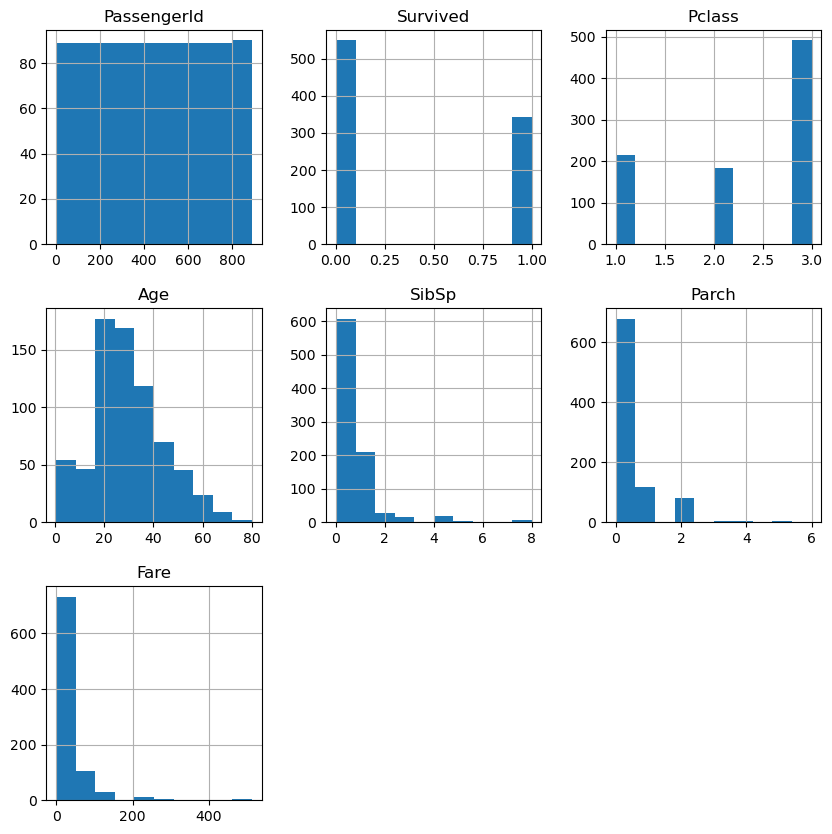

In [186]:
df.hist(figsize=(10,10))
plt.show()

<span style="color:#FF5F00"><b>AUFGABE 2:</b></span><br>
Überlegen Sie: Welche Aussagen können Sie aus den Histogrammen entnehmen? Wieviele Passagiere haben überlebt? Wie viele reisten in welcher Klasse? Wie alt waren die Passagiere im Schnitt? Reisten viele Passagiere alleine? Wie verteilten sich die Ticketpreise?

<span style="color:green"><b>Antwort zur AUFGABE 2:</b></span><br>

Aus den Histogrammen kann man folgendes schließen:

- etwa 350 Menschen haben überlebt
- die meisten (_etwa 500_) Passagiere waren in der 3. Klasse, der Rest wurde gleichmäßig ziwschen der 1. (_~210 Menschen_) und der 2. (_~180 Menschen_) Klasse verteilt
- der Durchschnitsalter war zwischen 18 und 40 Jahre
- die meisten Passagiere haben alleine gereist
- die meisten Tickets wurden sehr billig (_etwa 50 $_) verkauft. Es gab auch extrem teuere Tickets (_für ungefähr 500 $_)

<span style="color:#FF5F00"><b>AUFGABE 3:</b></span><br>

Eine Visualisierung des Anteils der Überlebenden zu einem Merkmal, z.B. zur Passagierklasse, könnte erste Hinweise auf ein gutes Modell liefern. Um dies einfach umzusetzen, ist die Bibliothek seaborn und dort der Befehl countplot sehr hilfreich. Schauen Sie in der Dokumentation von searborn nach und versuchen Sie es!

Tipp: Binden Sie die Bibliothek `seaborn` mit dem Kürzel `sns`ein und führen Sie im Anschluss den Befehl `sns.countplot(...)` aus. Eingabeparameter sind für `x` die Passagierklasse, für `hue` die Spalte mit dem Merkmal Überleben und für `data` der Datensatz. <br> Durch Ändern von `x='Pclass'` in ein anderes Merkmal können Sie dies auch für andere Merkmale tun. 
</div>

<Axes: xlabel='Pclass', ylabel='count'>

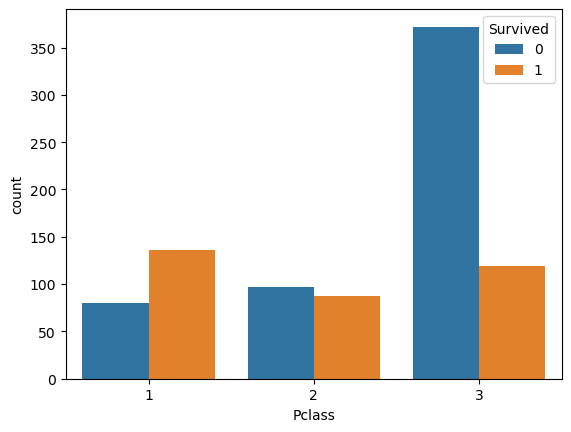

In [187]:
import seaborn as sns

sns.countplot(x=df["Pclass"], data=df, hue=df["Survived"])

# Fahrpreis -> Überleben (schwierig lesbar aber doch verständlich)
# sns.countplot(x=df["Fare"], data=df, hue=df["Survived"])

Aus dieser Darstellung zeigt sich bereits, dass Reisende der untersten Passagierklasse im Vergleich zu den beiden anderen Passagierklassen zu einem geringeren Anteil überlebt haben.

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Datenverständnis dient dazu, sich einen Überblick über die vorliegenden Daten zu verschaffen. Dabei sollten die Daten in Hinblick auf ihre Eigenschaften und Qualität und die dadurch ggf. auftretenden Probleme für die Aufgabenstellung analysiert werden.
</div>

### Datenvorbereitung (Data preparation) <a name="kap3"></a>

Bei der Datenvorbereitung wird ein Datensatz so weit vorbereitet, dass er anschließend für die Modellierung genutzt werden kann. Dabei sind viele Aspekte zu beachten:
- Fehlende Daten werden ergänzt.
- Der Datentyp wird überprüft und ggf. geändert.
- Es werden die Merkmale ausgewählt, die Einfluss auf die Zielvariable haben. 
- ...

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Offenbar ist der Datensatz nicht vollständig. Eine Ergänzung der fehlenden Daten erscheint, gerade bei dem Merkmal `Cabin` aber schwierig. Dieser Punkt wird zunächst zurückgestellt und dann betrachtet, sobald die Merkmale für die spätere Analyse ausgewählt wurden. 

Daten mit numerischem Typ können von Python besser analysiert und verarbeitet werden, deshalb sollen zunächst alle Merkmale vom Typ `object` betrachtet werden, um zu sehen, ob sie in Zahlen umgewandelt werden können: 

- Beim Merkmal Namen ist dies nicht sinnvoll.
- Das Merkmal `Sex` könnten durch `male`='männlich' mit 0 und `female`='weiblich' mit 1 umkodiert werden. 
- Das Merkmal `Ticket` beinhaltet eine unverständliche Buchstaben-Nummern-Kombination und bleibt deswegen unverändert. 
- Das Merkmal `Cabin` enthält nur wenige Daten und ist deswegen uninteressant. 
- Das Merkmal `Embarked` könnte mit Hilfe von Zahlen umkodiert werden, wegen des geringen zu erwartenden Einflusses wird dies zunächst nicht durchgeführt. 

In [189]:
df.loc[df.Sex == 'male', 'Sex']=0
df.loc[df.Sex == 'female', 'Sex']=1

Die Änderungen werden durch die Betrachtung der Daten überprüft: 

In [190]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Das Geschlecht ist immer noch vom Typ `object`. 

<span style="color:#FF5F00"><b>AUFGABE 4:</b></span><br>
    
Nutzen Sie die Dokumentation von Python oder eine Suchmaschine dazu, herauszufinden, wie sich der Datentyp der Spalte `df['Sex']` in `float` umwandeln lässt. Wenden Sie den passenden Befehl anschließend an. 
    
Tipp: Eine Möglichkeit ist in der Pandas Bibliothek zu finden. 
</div>

In [192]:
# pandas Datasets haben eingebaute Methode für solches Umwandeln 
df["Sex"] = df["Sex"].astype(float)

Die nachfolgende Ausgabe zeigt, dass das Vorgehen erfolgreich war. 

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


### 3.1 Aufteilung in Trainings- und Testdatensatz <a name="kap31"></a>

Beim überwachten Lernen wird der Datensatz in Trainings- und Testdatensatz aufgeteilt. Der Testdatensatz soll völlig unabhängig von allen späteren Entscheidungen sein, um damit die Güte der Vorhersage testen können. Daher wird diese Trennung üblicherweise vor der Merkmalsauswahl vorgenommen.

Im folgenden Abschnitt wird der Datensatz aufgeteilt. Die Größe des Testdatensatzsatzes soll 30 % betragen (`test_size=0.3`). Mit `random_state=0` wird sichergestellt, dass immer die gleichen 30% Testdaten ausgewählt werden (die Ergebnisse des Modells fallen sonst bei jeder Durchführung etwas anders aus), `stratify` sorgt dafür, dass nach der Teilung in Trainings- und Testmenge die Verteilung in den beiden Mengen der der Ausgangsmenge entspricht, das bedeutet der Anteil der Überlebenden ist in beiden Mengen gleich. 

An dieser Stelle wird zum ersten Mal die Bibliothek sklearn benutzt. Sie ist die beliebteste Bibliothek für maschinelles Lernen in Python und enthält viele wichtigen Befehle aus diesem Bereich.

In [194]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify=df['Survived'])

print(train_set)

     PassengerId  Survived  Pclass                                  Name  Sex  \
231          232         0       3              Larsson, Mr. Bengt Edvin  0.0   
836          837         0       3                      Pasic, Mr. Jakob  0.0   
639          640         0       3            Thorneycroft, Mr. Percival  0.0   
389          390         1       2                 Lehmann, Miss. Bertha  1.0   
597          598         0       3                   Johnson, Mr. Alfred  0.0   
..           ...       ...     ...                                   ...  ...   
131          132         0       3        Coelho, Mr. Domingos Fernandeo  0.0   
490          491         0       3  Hagland, Mr. Konrad Mathias Reiersen  0.0   
838          839         1       3                       Chip, Mr. Chang  0.0   
48            49         0       3                   Samaan, Mr. Youssef  0.0   
80            81         0       3                  Waelens, Mr. Achille  0.0   

      Age  SibSp  Parch    

### 3.2 Erste Merkmalsauswahl <a name="kap32"></a>

Zur Datenvorbereitung gehört die Entscheidung, welche Merkmale für die Modellierung betrachtet werden. So hat beispielsweise der Name der Reisenden offensichtlich keinen Einfluss auf das Überleben.

Bei anderen Merkmalen stellt sich die Frage nach dem Einfluss aber:
- Hat das Alter der Reisenden Einfluss auf ihren Überlebenswillen?
- Haben Reisende mit vielen Angehörigen an Bord sich bemüht, sie zu retten und dabei das eigene Überleben riskiert?
- Hat das Geschlecht Einfluss auf das Überleben? Haben sich Männer zuerst in die Rettungsboote gesetzt oder wurde nach dem Grundsatz "Frauen und Kinder zuerst" gehandelt?

Eine Idee für den Einfluss eines numerischen Merkmals auf ein anderes gibt der Korrelationskoeffizient.
Der Korrelationskoeffizient wird zwischen zwei Merkmalen berechnet und sein Wert liegt immer zwischen -1 und 1. Dabei bedeutet ein Wert nahe 0, dass zwei Merkmale sich gegenseitig nicht beeinflussen. Ein positiver Wert bedeutet, dass bei steigenden Werten des einen Merkmals auch die Werte des anderen Merkmals steigen. Je näher der Korrelationskoeffizient an 1 liegt, desto besser lässt sich das Verhältnis anhand einer Geraden mit positiver Steigung darstellen. Ein negativer Korrelationskoeffizient sagt aus, dass bei steigenden Werten des einen Merkmals die Werte des anderen Merkmals fallen. Je näher der Wert an -1 liegt, desto besser lässt sich das Verhältnis anhand einer Geraden mit negativer Steigung darstellen.

Ein Überblick über die Korrelationskoeffizienten lässt sich mit einem einfachen Befehl erzeugen. 

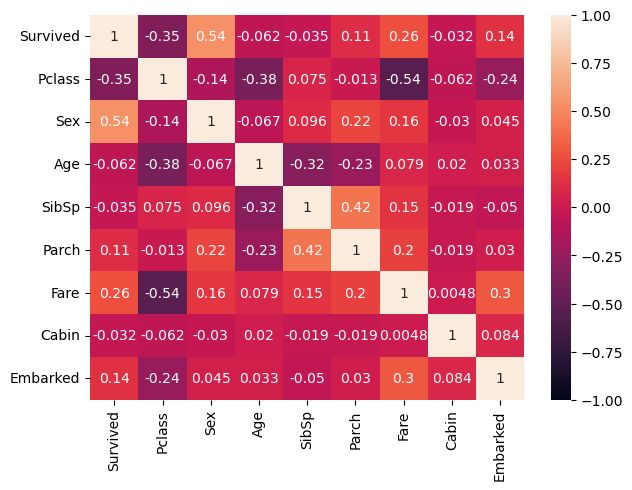

In [195]:
# Dieses Block musste angepasst werden,
# indem man die nicht metrische Werte
# entweder entfernt oder ersetzt

from sklearn import preprocessing
import seaborn as sns

# Kodiere aus Interesse ein paar Merkmale um
ohEnc = preprocessing.OneHotEncoder(sparse_output=False)

ohEnc.fit(pd.DataFrame(train_set["Embarked"]))
train_set["Embarked"] = ohEnc.transform(pd.DataFrame(train_set["Embarked"]))

ohEnc.fit(pd.DataFrame(train_set["Cabin"]))
train_set["Cabin"] = ohEnc.transform(pd.DataFrame(train_set["Cabin"]))

# Entferne die irrelevanteste Merkmale
train_set.drop(labels=["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
test_set.drop(labels=["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

corr_matrix = train_set.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

<span style="color:#FF5F00"><b>AUFGABE 5:</b></span><br>
<b>Arbeitsauftrag:</b> 
Überlegen Sie: welche Merkmale scheinen den größten Einfluss auf das Überleben auf der Titianic gehabt zu haben? 
</div>

<span style="color:green"><b>Antwort zur AUFGABE 5:</b></span><br>

Die Faktoren mit dem größten Einfluss auf das Überleben sind definitiv:

1. `Sex` - das Geschlecht
2. `Pclass` - die Passagierklasse
3. `Parch` - die Anzahl von Eltern/Kindern

Zusätzlich erscheinen ersmal beeinflussend solche Merkmale wie `Fare` und `Embarked`, aber diese:

1. hängen von einander stärker als von Übelebenschancen zusammen
2. entscheiden oft die Passagierklasse `Pclass`, die allein viel aussagekräftiger ist 

Zunächst wollen wir für die Modellierung deswegen ausschließlich die Merkmale `Sex` und `Pclass` (und natürlich `Survived` als Zielvariable) betrachten. Die Auswahl wird im nächsten Schritt durchgeführt, das Zielmerkmal wird als `y` (abhängige Variable), die Menge aus Geschlecht und Passagierklasse als `X` (unabhängige Variable) gespeichert: 

In [196]:
X_train = train_set[['Sex', 'Pclass']]
X_train.info()
y_train = train_set[['Survived']]

X_test = test_set[['Sex', 'Pclass']]
X_test.info()
y_test = test_set[['Survived']]

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 231 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     623 non-null    float64
 1   Pclass  623 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 421 to 607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     268 non-null    float64
 1   Pclass  268 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


Die Ansicht zeigt, dass bezüglich der ausgewählten Merkmale keine `NaN` Einträge vorhanden sind, deshalb kann mit der Modellierung begonnen werden. 

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Datenvorbereitung dient dazu, den Datensatz so zu bereinigen und vorzubereiten, dass mit diesem die Modellierung vorgenommen werden kann.
</div>

### Modellierung <a name="kap4"></a>

Nun wird mit Hilfe der ausgewählten Merkmale aus den Trainingsdaten ein Modell zur Vorhersage des Überlebens der Reisenden erstellt. Das Modell, welches hier genutzt wird, ist ein Entscheidungsbaum (Decision Tree). 

Die folgende Zelle importiert das Modul zur Nutzung von Entscheidungbäumen und iniziiert dann einen Baum mit Tiefe 2 (`max_depth = 2`), es dürfen also zwei Unterscheidungsebenen erstellt werden.

In [197]:
# Dieses Block musste angepasst werden, um die Warnung
# über invaliden Variablennamen zu entfernen

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

# Entferne die Variablennamen, um kein Warning zu bekommen
# tree_clf.fit(X_train, y_train)
tree_clf.fit(X_train.values, y_train.values)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [198]:
tree_clf.predict([[1,3]])

array([0])

Um das Modell zu visualisieren, wird mit dem folgenden Befehl der entstandene Baum ausgegeben.

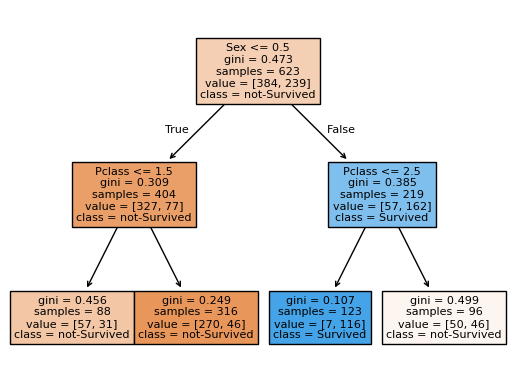

In [199]:
from sklearn import tree
tree.plot_tree(tree_clf, feature_names=X_train.columns, class_names=['not-Survived', 'Survived'], filled=True);

Das erste Modell wurde erfolgreich erzeugt. Die Visualisierung zeigt eine Entscheidung auf zwei Entscheidungsebenen, die erste nach dem Geschlecht, die zweite nach der Passagierklasse. Die Ausgabe (und Farbe) auf der untersten Ebene zeigen die Art der Klassifikation an.

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Modellierung dient dazu, die für den Datensatz geeigneten Methoden des Data Minings zu ermitteln und anzuwenden. Dabei werden die Parameter der Modelle optimiert und häufig verschiedene Modelle erstellt und verglichen.
</div>

### Modellgüte <a name="kap41"></a>

Ein erster Ansatz, um die Güte eines Modells einzuschätzen, ist die Trefferquote des Ziel-Merkmals bezüglich der Trainingsdaten und bezüglich der Testdaten. Dies wird in der folgenden Zelle berechnet:

In [200]:
# Dieses Block musste angepasst werden, um die Warnung
# über invaliden Variablennamen zu entfernen

print(tree_clf.score(X_train.values, y_train.values))
print(tree_clf.score(X_test.values, y_test.values))

0.7913322632423756
0.7761194029850746


<span style="color:#FF5F00"><b>AUFGABE 6:</b></span><br>
    
Eine weitere Möglichkeit, die Güte eines Modells zu überprüfen ist die Konfusionsmatrix. Um diese zu nutzen, ist die Funktion `confusion_matrix` aus dem metrics Modul sehr hilfreich. Schauen Sie in der Dokumentation von sklearn nach und versuchen Sie es!

Tipp: Importieren Sie aus der Bibliothek `sklearn` das Modul `metrics` und nutzen Sie dann den Befehl `metrics.confusion_matrix(...)` mit der durch das Modell ermittelten Klasse und der tatsächlichen Klasse als Eingabeparametern.<br>
    
Frage: Was könnten die Einträge der ausgegebenen Matrix bedeuten?   
</div>

In [201]:
from sklearn import metrics

cm_train = metrics.confusion_matrix(y_true=y_train.values, y_pred=tree_clf.predict(X_train.values))
print("Konfusionsmatrix (train):\n", cm_train)


cm_test = metrics.confusion_matrix(y_true=y_test.values, y_pred=tree_clf.predict(X_test.values))
print("Konfusionsmatrix (test):\n", cm_test)

Konfusionsmatrix (train):
 [[377   7]
 [123 116]]
Konfusionsmatrix (test):
 [[163   2]
 [ 58  45]]


<span style="color:green"><b>Antwort zur AUFGABE 6:</b></span><br>

Die Einträge in der Konfusionsmatrix zeigen die Anzahl von richtig und falsch erratenen Werten.

P.S.: Die Antwort auf diese Frage steht tatsächlich im nächsten Absatz :)

Die Konfusionsmatrix gibt uns genauer Erkenntnisse über die Art der falschen Vorhersagen.

Das erste Modell könnte nun herausgegeben werden, es ist aber sinnvoller, noch einmal die vorhergehenden Schritte durchzugehen und zu überlegen, ob es mit einem neuen Durchlauf noch verbessert werden kann.


<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Evaluation dient dazu, die erstellten Modelle qualitativ zu bewerten, diese mit der Aufgabenstellung abzugleichen und das beste Modell auszuwählen.
</div>

#### Iteration zu den vorhergehenden Schritten <a name="kap42"></a>

Bei diesem Schritt handelt es sich nicht um einen eigenen Arbeitsbereich, sondern vielmehr um die systematische Wiederholung der vorhergehenden Arbeitsbereiche für eine potentielle Verbesserung des Modells, beispielsweise anhand folgender Fragen: 
- Sollte versucht werden, fehlende Werte durch geschätzte Werte zu ersetzen, um nicht so viele Daten herauslöschen zu müssen?
- Können andere oder mehr Merkmale verwendet werden, um das Modell zu erstellen? 
- Kann eine Veränderung der Modellparameter zu einem verbesserten Modell führen? 


<span style="color:#FF5F00"><b>AUFGABE 7:</b></span><br>
    
Versuchen Sie, mit Hilfe der DataFrame Methode `df['Spaltenname'].mean()` und dem Anzeiger `df.loc` die fehlenden Werte in  `Age` und `Fare` durch mittelwerte zu ersetzen.

Bauen Sie nun einen Entscheidungsbaum, der auch die Merkmale `Parch`, `Age` und `Fare` für die Modellierung betrachtet.
Der Entscheidungsbaum soll sich bis zu einer Tiefe von 3 aufbauen. 

Zu Ihrer Hilfe findet sich unten schon ein Teil des Codes - Sie müssen nur die Punkte ersetzen.

</div>


In [202]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
df.loc[df['Fare'].isna(), 'Fare'] = df['Fare'].mean()

In [203]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify=df['Survived'])

X_train = train_set[['Sex', 'Pclass', 'Parch', 'Age', 'Fare']]
y_train = train_set[['Survived']]

X_test = test_set[['Sex', 'Pclass', 'Parch', 'Age', 'Fare']]
y_test = test_set[['Survived']]

In [204]:
tree_clf = DecisionTreeClassifier(max_depth=3)  
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


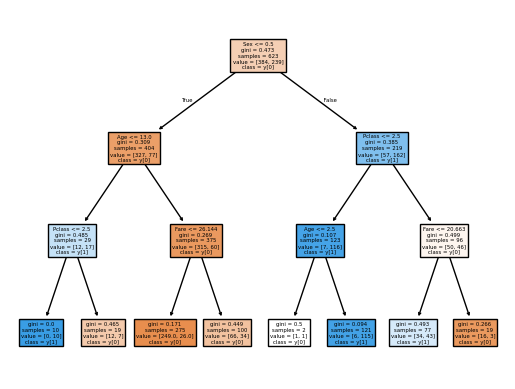

In [205]:
tree.plot_tree(tree_clf, feature_names = X_train.columns, class_names=True, filled=True);

In [206]:
print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.8218298555377207
0.8246268656716418


Das Modell hat sich durch diese Schritte ein wenig verbessert! 
Es kann beobachtet werden, dass sich ein Modell manchmal schon durch schlichtes Ausprobieren optimieren lässt.

<span style="color:#FF5F00"><b>AUFGABE 8:</b></span><br>

Nutzen Sie die nachfolgend vorgegebenen Bausteine, um mit der Auswahl der Merkmale und der Tiefe des Baums zu experimentieren, indem Sie die Bausteine einkommentieren und mit Parametern befüllen. Beschreiben Sie ihr finales Ergebnis. Halten Sie alle Vorgehensweisen und Parameter fest. Versuchen Sie, die Güte Ihres Modells so weit wie irgendmöglich zu optimieren.

In [309]:
# Baustein zum Trennen von Trainingsdaten und Testdaten

# Bereite Merkmal 'Embarked' mit vorhandenen Null-Werten vor
cdf = df.copy()
cdf['Embarked'] = cdf['Embarked'].fillna('0')

train_set, test_set = train_test_split(cdf, test_size=0.3, random_state=0, stratify=cdf['Survived'])

# Kodiere ein paar kategorische Merkmale um
ohEnc = preprocessing.OneHotEncoder(sparse_output=False)

ohEnc.fit(pd.DataFrame(cdf["Embarked"]))
train_set["Embarked"] = ohEnc.transform(pd.DataFrame(train_set["Embarked"]))
test_set["Embarked"] = ohEnc.transform(pd.DataFrame(test_set["Embarked"]))

ohEnc.fit(pd.DataFrame(cdf["Cabin"]))
train_set["Cabin"] = ohEnc.transform(pd.DataFrame(train_set["Cabin"]))
test_set["Cabin"] = ohEnc.transform(pd.DataFrame(test_set["Cabin"]))

# und erstelle die Datensätze
X_train = train_set[['Sex', 'Pclass']]
X_train.info()
y_train = train_set[['Survived']]

X_test = test_set[['Sex', 'Pclass']]
X_test.info()
y_test = test_set[['Survived']]

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 231 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     623 non-null    float64
 1   Pclass  623 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 421 to 607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     268 non-null    float64
 1   Pclass  268 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


0.7913322632423756
0.7761194029850746


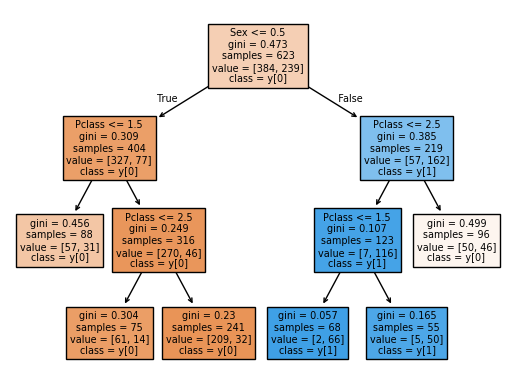

In [315]:
# Baustein zum Fitten und Ausgeben des Modells und seiner Güte
tree_clf_v2 = DecisionTreeClassifier(max_depth=3)
tree_clf_v2.fit(X_train, y_train)

tree.plot_tree(tree_clf_v2, feature_names=X_train.columns, class_names=True, filled=True)

print(tree_clf_v2.score(X_train, y_train))
print(tree_clf_v2.score(X_test, y_test))

<span style="color:green"><b>Antwort zur AUFGABE 8:</b></span><br>

Meine Idee bei dem Versuch ist, die höchsten Genauigkeiten vom Modell beim Training und Testen zu erreichen, ohne die mit dem Überleben am meisten korrilierenden Merkmale (_Sex und Pclass_) zu verwenden. In der folgenden Tabelle sind die einzelne Versuche, ihre Merkmale und erreichte Genauigkeiten in Form [Training; Testing] bei unterschiedlichen Baumtiefen aufgelistet:

| Merkmale | Tiefe 3 | Tiefe 4 | Tiefe 5 | Tiefe 6 | Tiefe 7 |
|:---------|:-------:|:-------:|:-------:|:-------:|:-------:|
| Sex, Pclass | [0.79; 0.78] | [0.79; 0.78] | [0.79; 0.78] | [0.79; 0.78] | [0.79; 0.78] |
| Age, Fare, Cabin, Embarked, SibSp, Parch | [0.70; 0.67] | [0.75; 0.69] | [0.75; 0.71] | [0.78; 0.71] | [0.80; 0.69] |
| Age, Fare, Cabin, Embarked | [0.71; 0.69] | [0.73; 0.69] | [0.74; 0.71] | [0.77; 0.71] | [0.81; 0.70] |
| Age, Fare, Cabin | [0.71; 0.69] | [0.73; 0.69] | [0.74; 0.71] | [0.77, 0.71] | [0.81; 0.69] |
| Age, Fare | [0.71; 0.69] | [0.73; 0.69] | [0.74; 0.71] | [0.77; 0.72] | [0.81; 0.69] |

Aus den durchgeführten Versuchen kann man schlussfolgern, dass die Kombination von _Sex_ und _Pclass_ Attributen fehlerbehaftet durch die Kombination von _Age_ und _Fare_ ersetzt werden kann. Dabei sollte man auch beachten, dass diese Ersetzung am effektivsten bei der Baumtiefe 6 ist (_während die ursrprungliche Kombination bei allen untersuchten Tiefen konstant genau ist_).